In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from gensim.models import Word2Vec
import datetime
from dateutil.relativedelta import relativedelta
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

C:\Users\Lassana Diabira\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
train=pd.read_csv("Training_set.csv")

In [3]:
test=pd.read_csv("Test_set.csv")

In [4]:
train.iloc[0]

Unnamed: 0                                                                              0
user_id                                                                             98304
job_id                                                                               3163
employer_id                                                                           208
job_opening_date                                                               2017-10-01
job_closing_date                                                               2018-11-19
job_description                         <h2 style="margin-left: 0px !important;">Overv...
job_type                                                                                1
job_title                                                      UK Sales Graduate Job 2019
employer_title                                                                        P&G
employer_description                    <p>Nearly five billion times a day, P&amp;G br...
employer_s

In [5]:
def get_job_info(df):
    job_info=[]
    for i in range(df.shape[0]):
        data=df.iloc[i]
        title=data["job_title"]
        job_sector_title=data["job_sector_title"]
        description=data["job_description"]
        em_title=data["employer_title"]
        em_sector_title=data["employer_sector_title"]
        em_description=data["employer_description"]
        a=""
        a+=title+" "
        a+=job_sector_title+" "
        a+=description+" "
        a+=em_title+" "
        a+=em_sector_title+" "
        a+=em_description+" "
        job_info.append(a)
    return job_info

In [6]:
train_job_info=get_job_info(train)

In [7]:
def clean(x):
    res=[] 
    for content in x:
        content=content.replace("&bull;","\r\n ").replace("\r\r\n\t"," ").replace("\r\r\n"," ")
        content=content.replace("\r\r\n\r\r\n"," ").replace("..."," ").replace("&#39;s","").replace(":","")
        content=content.replace("&eacute;","e").replace("&lsquo;","").replace("&#39;","")
        content=content.replace("&nbsp;"," ").replace("&#39;","").replace("amp;","").replace("&middot;","")
        content=content.replace("."," ").replace(",","").replace("?"," ").replace("!","").replace("  "," ")
        content=content.replace("&rsquo;","").replace("\t"," ").replace("\r\n\r\n","").replace(" \r\n ","")
        content=content.replace("&ndash;"," ").replace("\r\n\r\n"," ").replace(" \r\n "," ").replace("\r\n"," ")
        content=content.replace("\r"," ").replace("  ","").replace("   ","").replace("  ","").replace("   ","")
        content=content.replace("(","").replace(")","").replace(" - "," ").replace(" / "," ").replace("/"," ").replace("   ","")
        content=re.sub('<.*?>',"",content , flags=re.DOTALL)
        content=content.split(" ")
        y=[]
        for i in content:
            if len(i)>1:
                y.append(i.lower())
        res.append(y)
    return res

In [8]:
cleaned_train_job_info=clean(train_job_info)

In [9]:
cleaned_train_job_info[100]

['graduate',
 'consultant',
 'climate',
 'change',
 'cities',
 'technology',
 'consulting',
 'project',
 'management',
 'at',
 'arup',
 'we',
 'are',
 'passionate',
 'about',
 'designing',
 'and',
 'delivering',
 'ground-breaking',
 'work',
 'in',
 'infrastructure',
 'building',
 'design',
 'and',
 'specialist',
 'technical',
 'services',
 'independent',
 'in',
 'ownership',
 'and',
 'spirit',
 'we',
 'are',
 'global',
 'firm',
 'of',
 'designers',
 'planners',
 'engineers',
 'consultants',
 'and',
 'technical',
 'experts',
 'using',
 'our',
 'skills',
 'to',
 'help',
 'shape',
 'better',
 'world',
 'our',
 'energy',
 'climate',
 'change',
 'and',
 'cities',
 'consulting',
 'team',
 'in',
 'london',
 'is',
 'multi-disciplinary',
 'team',
 'of',
 'engineers',
 'policy',
 'experts',
 'and',
 'environmental',
 'scientists',
 'who',
 'focus',
 'on',
 'the',
 'challenges',
 'and',
 'opportunities',
 'of',
 'energy',
 'climate',
 'change',
 'and',
 'cities',
 'our',
 'areas',
 'of',
 'busine

In [10]:
def remove_stopwords(x):
    res=[]
    with open('stopwords.txt') as stopfile:
        stopwords = stopfile.read()
        stop = stopwords.split()
    for i,job in enumerate(x):
        a=[]
        for word in job:
            if word not in stop:
                a.append(word)
        res.append(a)
    return res

In [11]:
train_clean=remove_stopwords(cleaned_train_job_info)

In [12]:
train_clean[0]

['uk',
 'sales',
 'graduate',
 'job',
 '2019',
 'sales',
 'commercial',
 'overview',
 'want',
 'work',
 'brands',
 'millions',
 'consumers',
 'live',
 'without',
 'want',
 'work',
 'like-minded',
 'talented',
 'colleagues',
 'motivated',
 'challenging',
 'problems',
 'real',
 'responsibility',
 'winning',
 'perfect',
 'opportunity',
 'apply',
 'now',
 'join',
 'p&g',
 'sales',
 'team',
 'expect',
 'working',
 'sales',
 'p&g',
 'means',
 'getting',
 'multi',
 'million',
 'pound',
 'business',
 'budget',
 'lead',
 'day',
 'means',
 'working',
 'great',
 'brands',
 'like',
 'pampers',
 'fairy',
 'gillette',
 'uk',
 'biggest',
 'grocery',
 'retailers',
 'will',
 'key',
 'contact',
 'business',
 'retailer',
 'responsible',
 'building',
 'maintaining',
 'relationship',
 'will',
 'build',
 'design',
 'ideas',
 'strategies',
 'using',
 'analytics',
 'shopper',
 'insights',
 'use',
 'relationship',
 'understanding',
 'market',
 'sell',
 'negotiate',
 'execute',
 'ideas',
 'full',
 'time',
 'hir

In [13]:
def get_occurence(x):
    res=[]
    for job in x:
        res.append(dict(Counter(job)))
    return res

In [14]:
occurences=get_occurence(train_clean)

In [15]:
occurences[0]

{'uk': 2,
 'sales': 8,
 'graduate': 2,
 'job': 3,
 '2019': 1,
 'commercial': 4,
 'overview': 1,
 'want': 3,
 'work': 6,
 'brands': 3,
 'millions': 1,
 'consumers': 1,
 'live': 1,
 'without': 1,
 'like-minded': 1,
 'talented': 1,
 'colleagues': 1,
 'motivated': 1,
 'challenging': 2,
 'problems': 1,
 'real': 3,
 'responsibility': 2,
 'winning': 1,
 'perfect': 1,
 'opportunity': 2,
 'apply': 3,
 'now': 1,
 'join': 1,
 'p&g': 13,
 'team': 2,
 'expect': 1,
 'working': 3,
 'means': 2,
 'getting': 1,
 'multi': 1,
 'million': 1,
 'pound': 1,
 'business': 5,
 'budget': 1,
 'lead': 1,
 'day': 4,
 'great': 2,
 'like': 1,
 'pampers': 1,
 'fairy': 2,
 'gillette': 2,
 'biggest': 1,
 'grocery': 1,
 'retailers': 1,
 'will': 6,
 'key': 1,
 'contact': 1,
 'retailer': 2,
 'responsible': 1,
 'building': 2,
 'maintaining': 1,
 'relationship': 2,
 'build': 1,
 'design': 1,
 'ideas': 3,
 'strategies': 1,
 'using': 1,
 'analytics': 1,
 'shopper': 1,
 'insights': 1,
 'use': 1,
 'understanding': 1,
 'market': 1

In [16]:
def get_vector(occurences, jobs, vector_size):
    vector=[]
    model = Word2Vec.load('model.bin')
    nb=len(jobs)
    for i,job in enumerate(jobs):
        if i%5000==0:
            print("progress : ",i/nb )
        res=np.zeros(vector_size,)
        n=sum(list(occurences[i].values()))
        for word in job:
            try:
                a=model[word]
            except:
                a=None
            if a is not None:
                count=occurences[i][word]
                w=count/n
                res+=w*a
        vector.append(res)
    return vector

In [18]:
X=get_vector(occurences, train_clean, 200)

progress :  0.0


C:\Users\Lassana Diabira\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


progress :  0.03995652729829945
progress :  0.0799130545965989
progress :  0.11986958189489835
progress :  0.1598261091931978
progress :  0.19978263649149725
progress :  0.2397391637897967
progress :  0.27969569108809617
progress :  0.3196522183863956
progress :  0.35960874568469503
progress :  0.3995652729829945
progress :  0.43952180028129395
progress :  0.4794783275795934
progress :  0.5194348548778929
progress :  0.5593913821761923
progress :  0.5993479094744918
progress :  0.6393044367727913
progress :  0.6792609640710906
progress :  0.7192174913693901
progress :  0.7591740186676895
progress :  0.799130545965989
progress :  0.8390870732642884
progress :  0.8790436005625879
progress :  0.9190001278608874
progress :  0.9589566551591868
progress :  0.9989131824574863


In [20]:
X_train=np.array(X)

In [21]:
pca = PCA(n_components=2)
result = pca.fit_transform(X_train)

In [22]:
print(pca.explained_variance_ratio_)

[0.15216099 0.11486964]


In [23]:
def get_job_info_plot(df):
    job_info=[]
    for i in range(df.shape[0]):
        data=df.iloc[i]
        title=data["job_title"]
        em_title=data["employer_title"]
        a=""
        a+=title+" "
        a+=em_title+" "
        job_info.append(a)
    return job_info

In [24]:
infos=get_job_info_plot(train)

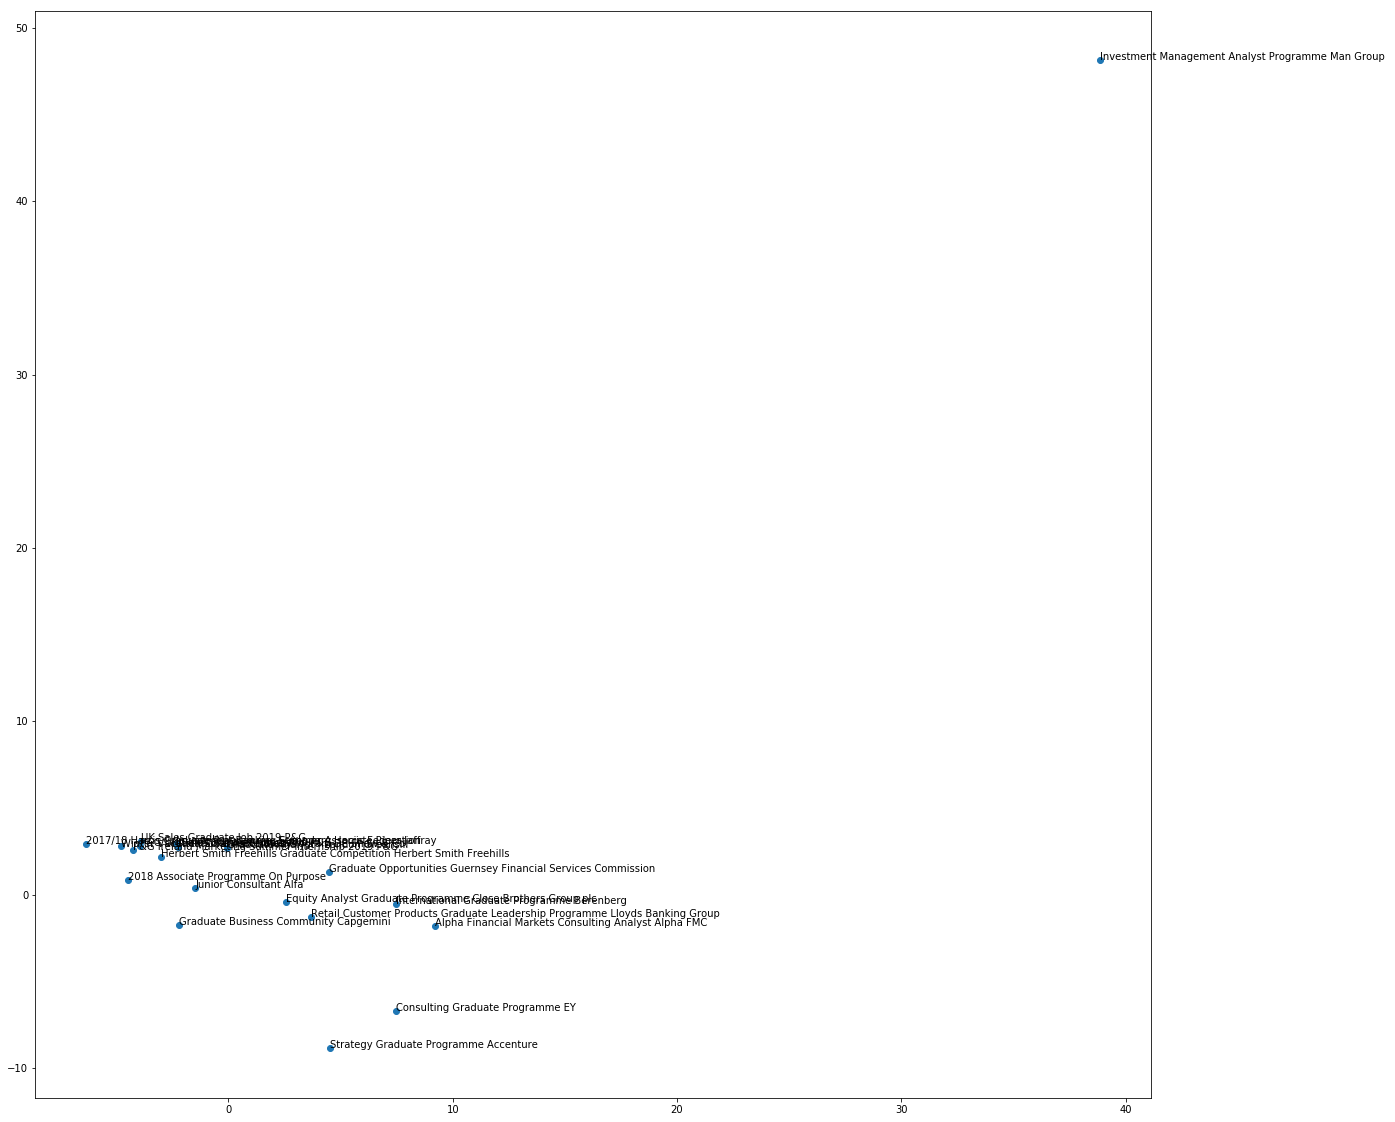

In [25]:
k=20
plt.figure(figsize=(20,20))
plt.scatter(result[:k, 0], result[:k, 1])
for i, word in enumerate(infos[:k]):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [37]:
list(cosine_similarity(X_train[0,:].reshape(1, -1) , X_train))[0]

array([1.        , 0.93035729, 0.98052574, ..., 0.38701658, 0.48999592,
       0.12166929])

In [70]:
def get_similar_doc(X_train, doc_id, n):
    res=[]
    beta=[]
    cos=list(cosine_similarity(X_train[doc_id,:].reshape(1, -1) , X_train))[0]
    most_similar_doc_id=np.argsort(cos)[::-1]
    a=0
    while cos[most_similar_doc_id[a]]>=0.9999999:
        a+=1
    most_similar_doc_id=most_similar_doc_id[a:]
    res.append(most_similar_doc_id[0])
    beta.append(cos[most_similar_doc_id[0]])
    for i in range(1,len(most_similar_doc_id)):
        if cos[most_similar_doc_id[i]] not in beta:
            res.append(most_similar_doc_id[i])
            beta.append(cos[most_similar_doc_id[i]])
    print("most similar doc : ", res[:n])
    print("not similar doc : ", res[-n:])
    return cos[res]

In [79]:
get_similar_doc(X_train, 10000, 5)

165
most similar doc :  [58730, 24925, 45024, 93539, 72288]
not similar doc :  [110708, 89713, 23342, 74184, 67037]


array([ 0.95304687,  0.92999877,  0.91797029, ..., -0.11844279,
       -0.13917662, -0.21952725])

In [93]:
def clean_similarity(x):
    res=[] 
    for content in x:
        content=content.replace("&bull;","\r\n ").replace("\r\r\n\t"," ").replace("\r\r\n"," ")
        content=content.replace("\r\r\n\r\r\n"," ").replace("..."," ").replace("&#39;s","").replace(":","")
        content=content.replace("&eacute;","e").replace("&lsquo;","").replace("&#39;","")
        content=content.replace("&nbsp;"," ").replace("&#39;","").replace("amp;","").replace("&middot;","")
        content=content.replace("."," ").replace(",","").replace("?"," ").replace("!","").replace("  "," ")
        content=content.replace("&rsquo;","").replace("\t"," ").replace("\r\n\r\n","").replace(" \r\n ","")
        content=content.replace("&ndash;"," ").replace("\r\n\r\n"," ").replace(" \r\n "," ").replace("\r\n"," ")
        content=content.replace("\r"," ").replace("  ","").replace("   ","").replace("  ","").replace("   ","")
        content=content.replace("(","").replace(")","").replace(" - "," ").replace(" / "," ").replace("/"," ").replace("   ","")
        content=re.sub('<.*?>',"",content , flags=re.DOTALL)
        res.append(content)
    return res

In [94]:
data_similarity=clean_similarity(train_job_info)

In [95]:
data_similarity[10000]

'European Graduate Marketing Programme Technology Consulting & Project Management Description Starting in one of our key offices Paris Cologne Milan Madrid Vienna Zurich or Amsterdam youll take responsibility for a diverse and challenging range of strategic digital marketing and retail missions in your first year After this its expected youll take your skills and experience to a different European office to drive commercial performance further afield This is not like any other programme; it will flex with the business need keeping you challenged and accelerating your marketing career  Market Overview Dyson offices can be found across Europe and beyond into the Asia- Pacific Americas and more recently the Middle East With over 10000 people worldwide and ever-expanding still Dyson is making its mark in key cities around the world Our European offices are home to close-knit teams all dedicated to make a difference for the future of our global company From fighting fierce competition to fi

In [96]:
data_similarity[58730]

'Marketing Placement Programme 12-months 2017 Sept start Marketing and PR Description Our Marketing and Creative teams launch our latest machines to the world bringing our problem-solving technology to life in engaging ways Over the course of the year-long placement youll be assigned to a category team Personal Care Environmental Control or Floor care making a valuable contribution from day one  Market Overview Home to our global Research Design and Development centre and all of our Commercial functions the Dyson HQ campus can be found in secluded countryside that helps keep our secrets secret Having doubled in size in 2016 the campus is now home to new research and development facilities a new restaurant home to an English Electric Lightning jet and a sports facility catering to all Dyson people Nearby are the fashionable cities of Bristol and Bath where a young James Dyson invented cyclone technology  The building is the heartbeat of Dyson Over 2500 people including James himself spe

In [97]:
data_similarity[67037]

'TPP Top 50 Oxford events Technology Consulting & Project Management On Tuesday 31st October we are hosting evening reception with free drinks and food at the Bodleian Library featuring renowned stand-up comedian Sean Lock As well as live entertainment the reception will give you the opportunity to chat to TPP Oxford alumni and find out what it is like to work at the heart of a fast-paced technology company  Job interviews will take place at the Examination Schools in Oxford on Thursday 2nd and Friday 3rd November giving you the opportunity to walk away with a &pound;40000 graduate job by the end of the week Oxford Events October  17th October Drinks reception at Lady Margaret Hall When 7 30pm 10pm  Where Talbot Hall 18th October Physics Society science-themed quiz night free pizza & drinks When 5 15pm Where Physics Society 18th October Oxford Union event with JJ Abrams When 8pm Where Oxford Union 23rd October Evening reception at St Hughs College When 7 30pm 10pm Where Wordsworth Room

In [92]:
train_job_info[67037]

'TPP Top 50 Oxford events Technology: Consulting & Project Management <p>On&nbsp;Tuesday 31st October&nbsp;we are hosting evening reception&nbsp;with free drinks and food&nbsp;at&nbsp;the Bodleian Library,&nbsp;featuring renowned stand-up comedian&nbsp;Sean Lock. As well as live entertainment, the reception will give you the opportunity to chat to TPP Oxford alumni and find out what it is like to work at the heart of a fast-paced technology company.</p>\r\r\n\r\r\n<p>Job interviews will take place at the&nbsp;Examination Schools&nbsp;in Oxford on&nbsp;Thursday 2nd and Friday 3rd November, giving you the opportunity to walk away with a&nbsp;&pound;40,000&nbsp;graduate job by the end of the week!</p>\r\r\n\r\r\n<p>Oxford Events</p>\r\r\n\r\r\n<h2>October:</h2>\r\r\n\r\r\n<ul>\r\r\n\t<li>17th October<br />\r\r\n\tDrinks&nbsp;reception at Lady Margaret Hall<br />\r\r\n\tWhen: 7.30pm &ndash; 10pm&nbsp;<br />\r\r\n\tWhere: Talbot Hall</li>\r\r\n\t<li>18th October<br />\r\r\n\tPhysics Society